In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('plants_and_bees.csv', parse_dates=['date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sample_id       1250 non-null   int64         
 1   bees_num        1250 non-null   int64         
 2   date            1250 non-null   datetime64[ns]
 3   season          1250 non-null   object        
 4   site            1250 non-null   object        
 5   native_or_non   1250 non-null   object        
 6   sampling        1250 non-null   object        
 7   plant_species   1250 non-null   object        
 8   time            1250 non-null   int64         
 9   bee_species     1250 non-null   object        
 10  sex             1250 non-null   object        
 11  specialized_on  7 non-null      object        
 12  parasitic       1187 non-null   float64       
 13  nesting         1196 non-null   object        
 14  status          15 non-null     object        
 15  nonn

In [ ]:
df.head()

,sample_id,bees_num,date,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,specialized_on,parasitic,nesting,status,nonnative_bee
0,17400,23,2017-04-18,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
1,17400,23,2017-04-18,early.season,A,native,pan traps,None,935,Agapostemon texanus,f,NaN,0.0,ground,NaN,0.0
2,17400,23,2017-04-18,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
3,17400,23,2017-04-18,early.season,A,native,pan traps,None,935,Andrena carlini,f,NaN,0.0,ground,NaN,0.0
4,17400,23,2017-04-18,early.season,A,native,pan traps,None,935,Andrena perplexa,m,NaN,0.0,ground,NaN,0.0


In [ ]:
# Calculate the percentage of missing values in each column
missing_values_percentage = df.isna().sum() / df.shape[0]

# Identify the columns where the percentage of missing values is greater than 80%
columns_with_high_missing_values = missing_values_percentage[missing_values_percentage > 0.80].index

# Print the index names of the columns with high missing values
df = df.drop(columns=columns_with_high_missing_values, axis=1)

In [ ]:
df = df.dropna()
df = df.drop_duplicates()

* I chose to drop columns that are missing over 80% of their values because that's too much data missing
* Dropping the null values seemed like the best option with so few of them present in the columns
* There was quite a few duplicates that got dropped for the sake of not skewing the data

## Which plants are preferred by native vs non-native bee species?


<Axes: xlabel='native_or_non', ylabel='bees_num'>

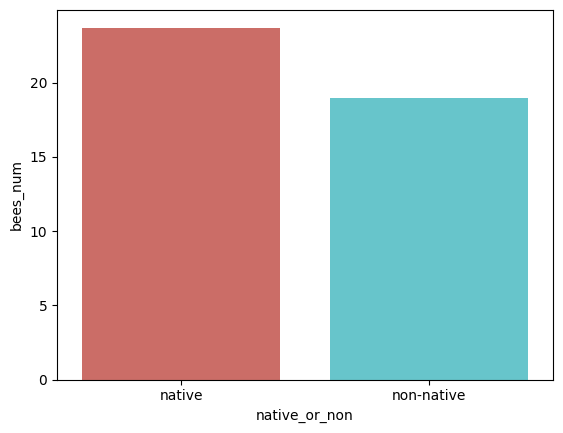

In [ ]:
df_grouped = df.groupby('native_or_non').agg({'bees_num': 'mean'})
sns.barplot(x = df_grouped.index, y = df_grouped['bees_num'], palette = 'hls')

In [ ]:
native_bees, non_native_bees = df.loc[df['nonnative_bee'] == 1.0], df.loc[df['nonnative_bee'] == 0.0]

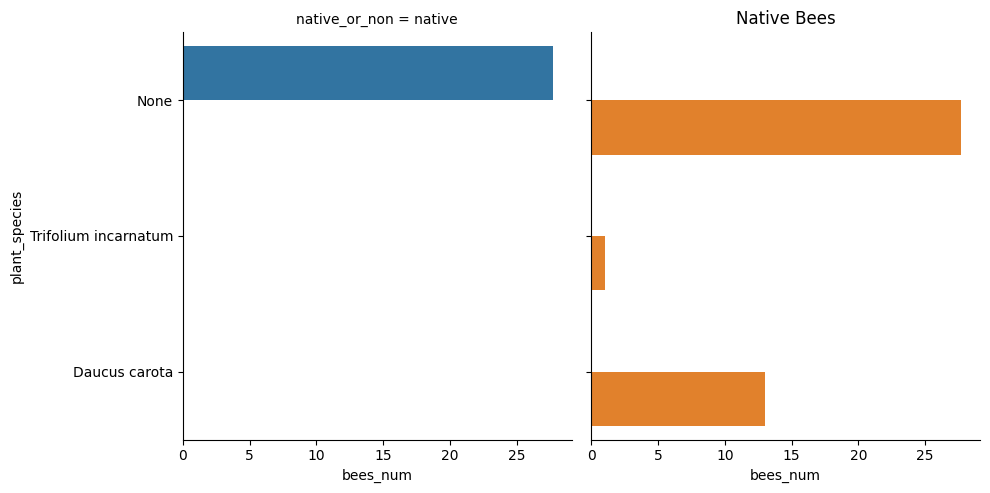

In [ ]:
# Create a catplot
sns.catplot(data=native_bees, x='bees_num',
            y='plant_species',
            hue='native_or_non',
            kind='bar',
            orient="h",
            col="native_or_non",
            col_wrap=2,errorbar=None)

plt.title("Native Bees")
# Show the plot
plt.show()


## Though the sample is quite small, from this we can conclude that native bees prefer non native plants

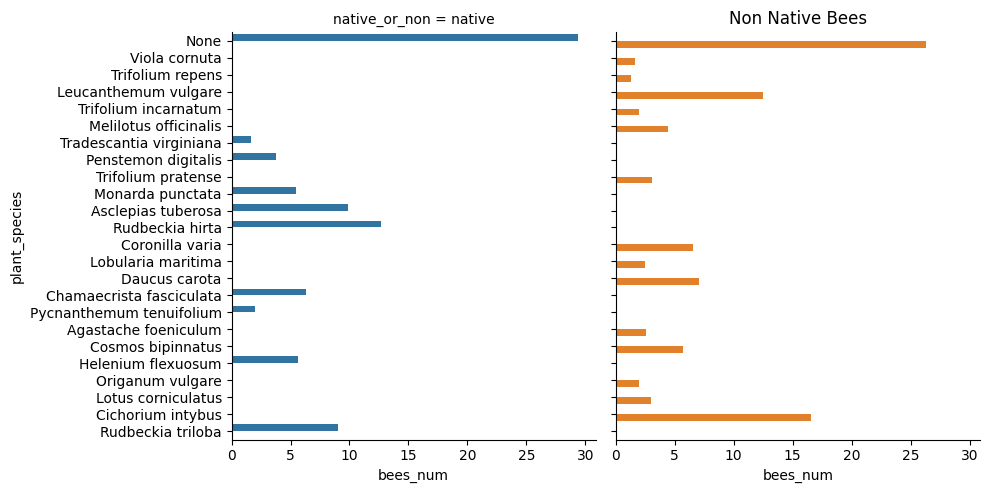

In [ ]:
# Create a catplot
sns.catplot(data=non_native_bees, x='bees_num',
            y='plant_species',
            hue='native_or_non',
            kind='bar',
            orient="h",
            col="native_or_non",
            col_wrap=2,errorbar=None)

plt.title("Non Native Bees")
# Show the plot
plt.show()


## Non native bees prefer non-native plants

## A visualization of the distribution of bee and plant species across one of the samples.

<Axes: xlabel='count', ylabel='plant_species'>

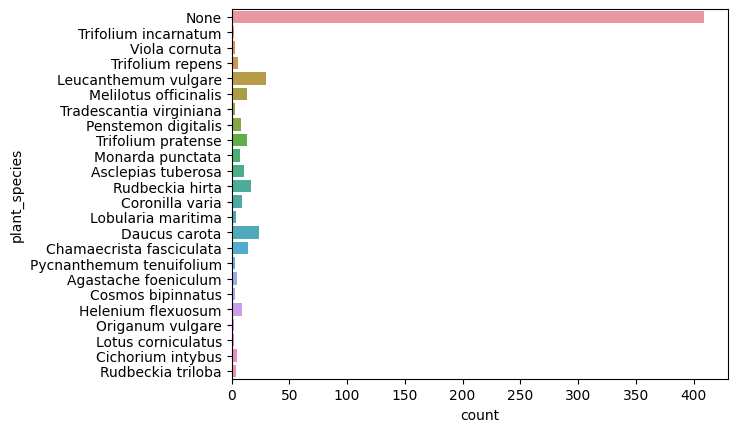

In [ ]:
sns.countplot(y=df['plant_species'])

<Axes: xlabel='bees_num', ylabel='Count'>

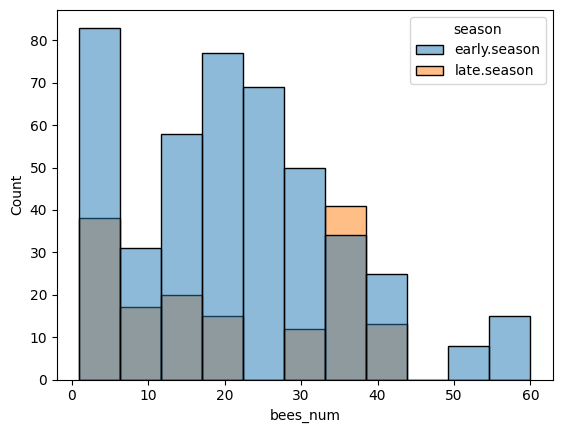

In [ ]:
sns.histplot(
    data=df,
    x="bees_num",
    hue="season",
)

The number of bees in the early season is higher than the number of bees in the late season.

* The number of bees peaks in the spring and summer, when there is an abundance of flowers and other food sources.
* The number of bees declines in the fall and winter, as the weather becomes colder and food sources become scarce.
* The difference in the number of bees between the early and late seasons is most pronounced in the spring and fall.

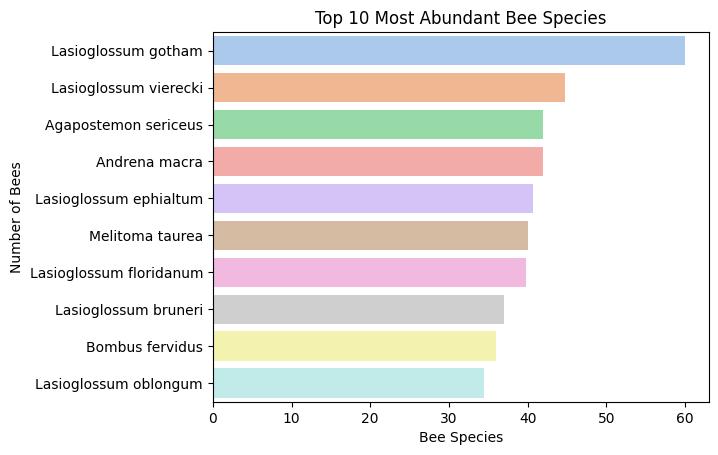

In [ ]:
bee_species_grouped = df.groupby('bee_species')['bees_num'].mean().nlargest(10)
# Create a Seaborn bar chart
sns.barplot(
    y = bee_species_grouped.index,
    x = bee_species_grouped.values,
    palette = 'pastel'
)

# Add a title and labels
plt.title('Top 10 Most Abundant Bee Species')
plt.xlabel('Bee Species')
plt.ylabel('Number of Bees')

# Show the plot
plt.show()

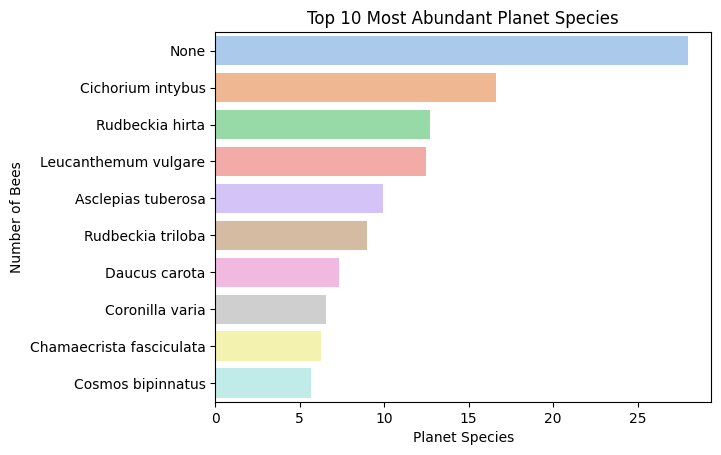

In [ ]:
planet_species_grouped = df.groupby('plant_species')['bees_num'].mean().nlargest(10)
# Create a Seaborn bar chart
sns.barplot(
    y = planet_species_grouped.index,
    x = planet_species_grouped.values,
    palette = 'pastel'
)

# Add a title and labels
plt.title('Top 10 Most Abundant Planet Species')
plt.xlabel('Planet Species')
plt.ylabel('Number of Bees')

# Show the plot
plt.show()

## Select the top three plant species you would recommend to the agency to support native bees.

Since I concluded that native bees prefer non native plants and by looking at the most abundant species and the graphs I would recommend:

* Cichorium Intybus
* Leucanthemum vulgare
* Daucus Carota